In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [8]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df["target"]=iris.target

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [16]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [18]:
df["flower_name"]=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
from matplotlib import pyplot as plt

In [20]:
%matplotlib inline

In [21]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


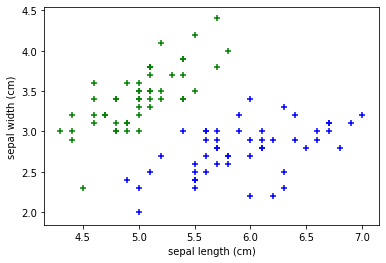

In [23]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')

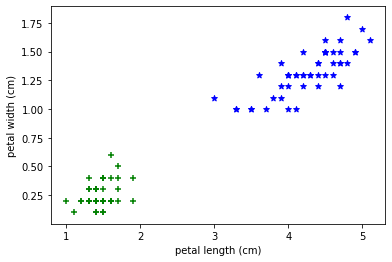

In [29]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='*')

In [30]:
from sklearn.model_selection  import train_test_split

In [33]:
x=df.drop(['target','flower_name'],axis='columns')
x.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [34]:
y=df.target
y.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [50]:
len(x_train)

105

In [51]:
len(x_test)

45

# Support Vector Machine 

In [52]:
from sklearn.svm import SVC

In [53]:
model=SVC()

In [54]:
model.fit(x_train,y_train)

C:\Python\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
model.score(x_test,y_test)

0.9777777777777777

In [101]:
model=SVC(C=1,gamma=100,kernel='rbf')

In [102]:
model.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
model.score(x_test,y_test)

0.5333333333333333

In [113]:
model=SVC(C=10,gamma=100,kernel='linear')

In [114]:
model.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
model.score(x_test,y_test)

0.9777777777777777

# Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
model=LogisticRegression()

In [117]:
model.fit(x_train,y_train)

C:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
model.score(x_test,y_test)

0.9777777777777777

# Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
model=DecisionTreeClassifier(criterion='gini')

In [131]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [132]:
model.score(x_test,y_test)

0.9555555555555556

# Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
model=RandomForestClassifier(n_estimators=30)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
model.score(x_test,y_test)

0.9333333333333333

# Naive_Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB

In [141]:
model=GaussianNB()

In [142]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [143]:
model.score(x_test,y_test)

0.9333333333333333

In [157]:
from sklearn.naive_bayes import MultinomialNB

In [158]:
model=MultinomialNB()

In [159]:
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [160]:
model.score(x_test,y_test)

0.9777777777777777

# KNN Classifier

In [186]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
model=KNeighborsClassifier()

In [188]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [189]:
model.score(x_test,y_test)

0.9555555555555556

# K-Means Cluster

In [185]:
from sklearn.cluster import KMeans

In [178]:
model=KMeans()

In [179]:
model.fit(x_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [180]:
model.score(x_test,y_test)

-10.159375572460334

In [181]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    model = KMeans(n_clusters=k)
    model.fit(x_train,y_train)
    sse.append(model.inertia_)

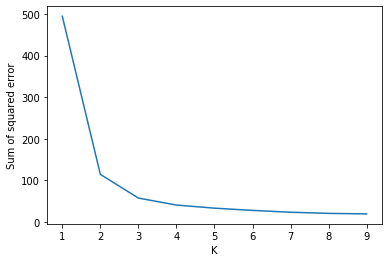

In [182]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)